# SUPERVISED LEARNING - REGRESSION

## IMPORT PACKAGE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## GATHERING DATA

In [2]:
train = pd.read_csv('train.csv', sep = ',')
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


## **ASSESSING DATA**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
train.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
print('Duplicate Data : ', train.duplicated().sum())

Duplicate Data :  0


In [6]:
train.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


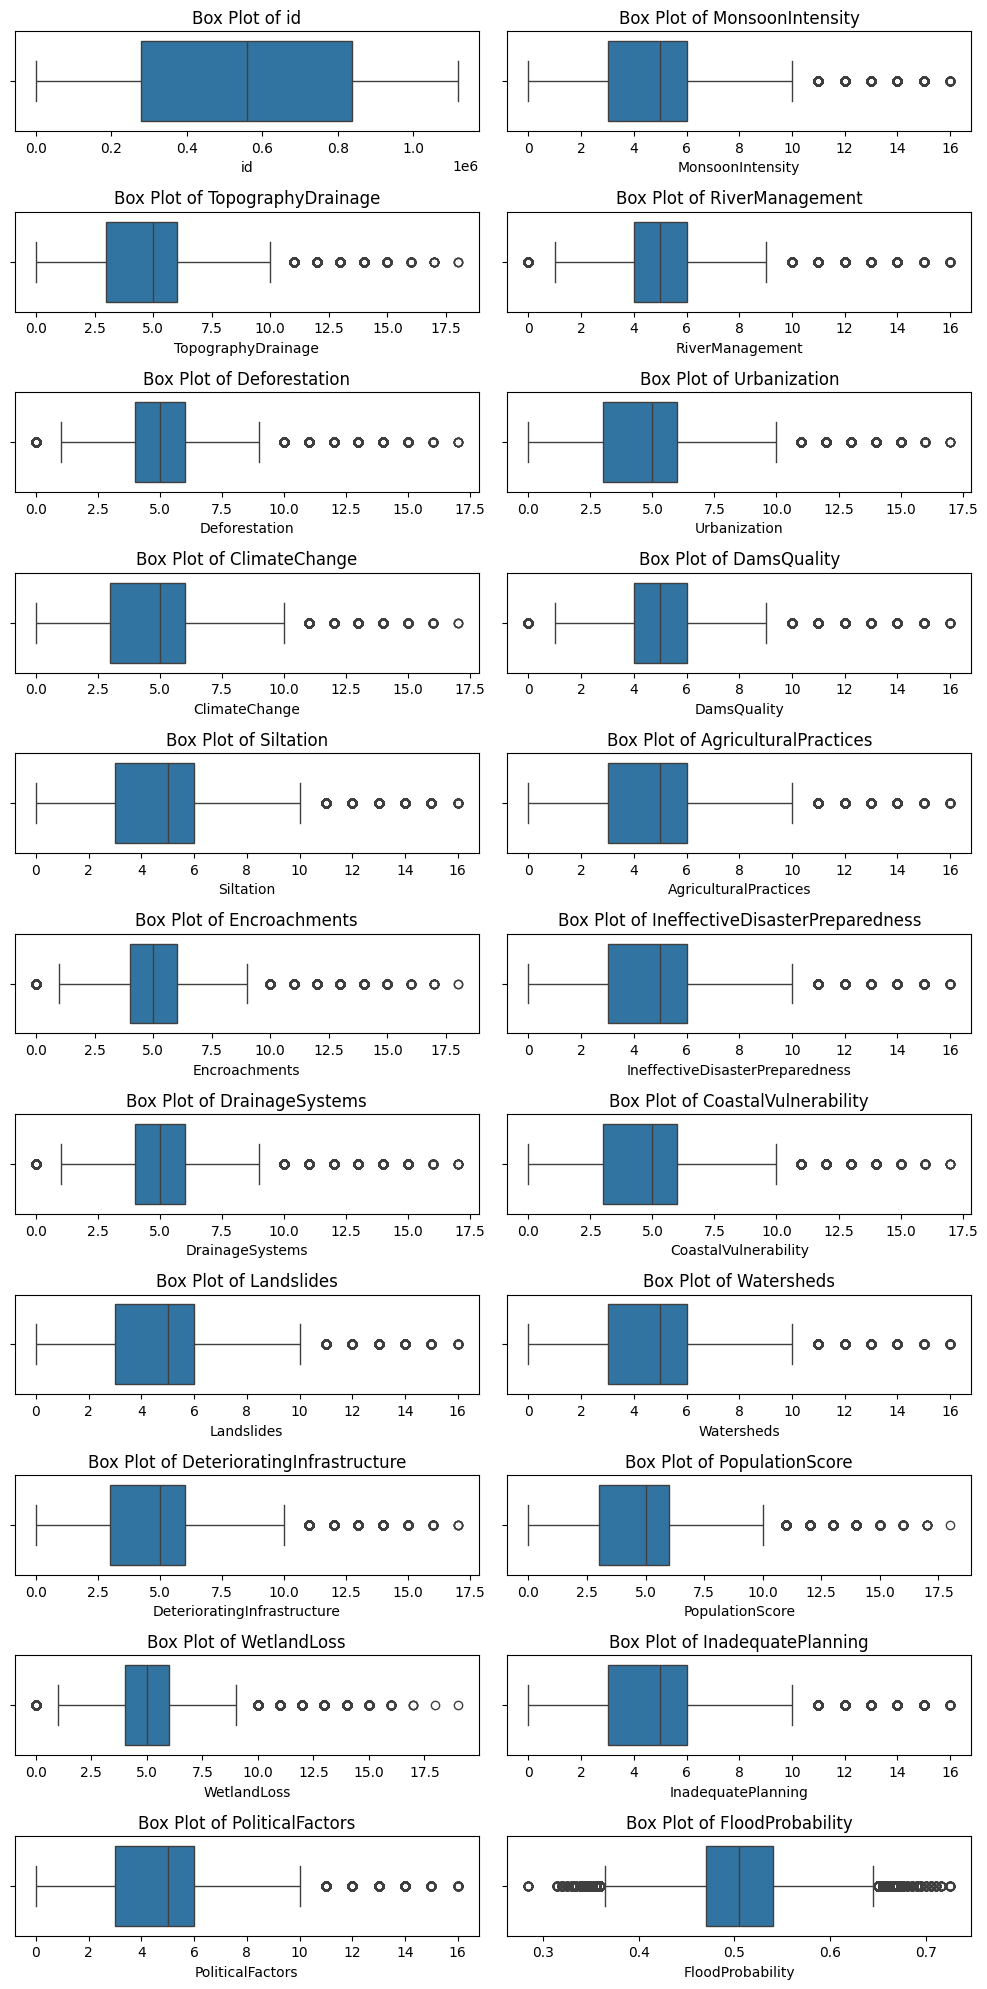

In [7]:
plt.figure(figsize = (10,20))
for i, column in enumerate(train.columns, start = 1):
    plt.subplot(11,2,i)
    sns.boxplot(x=train[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

## CLEANING DATA

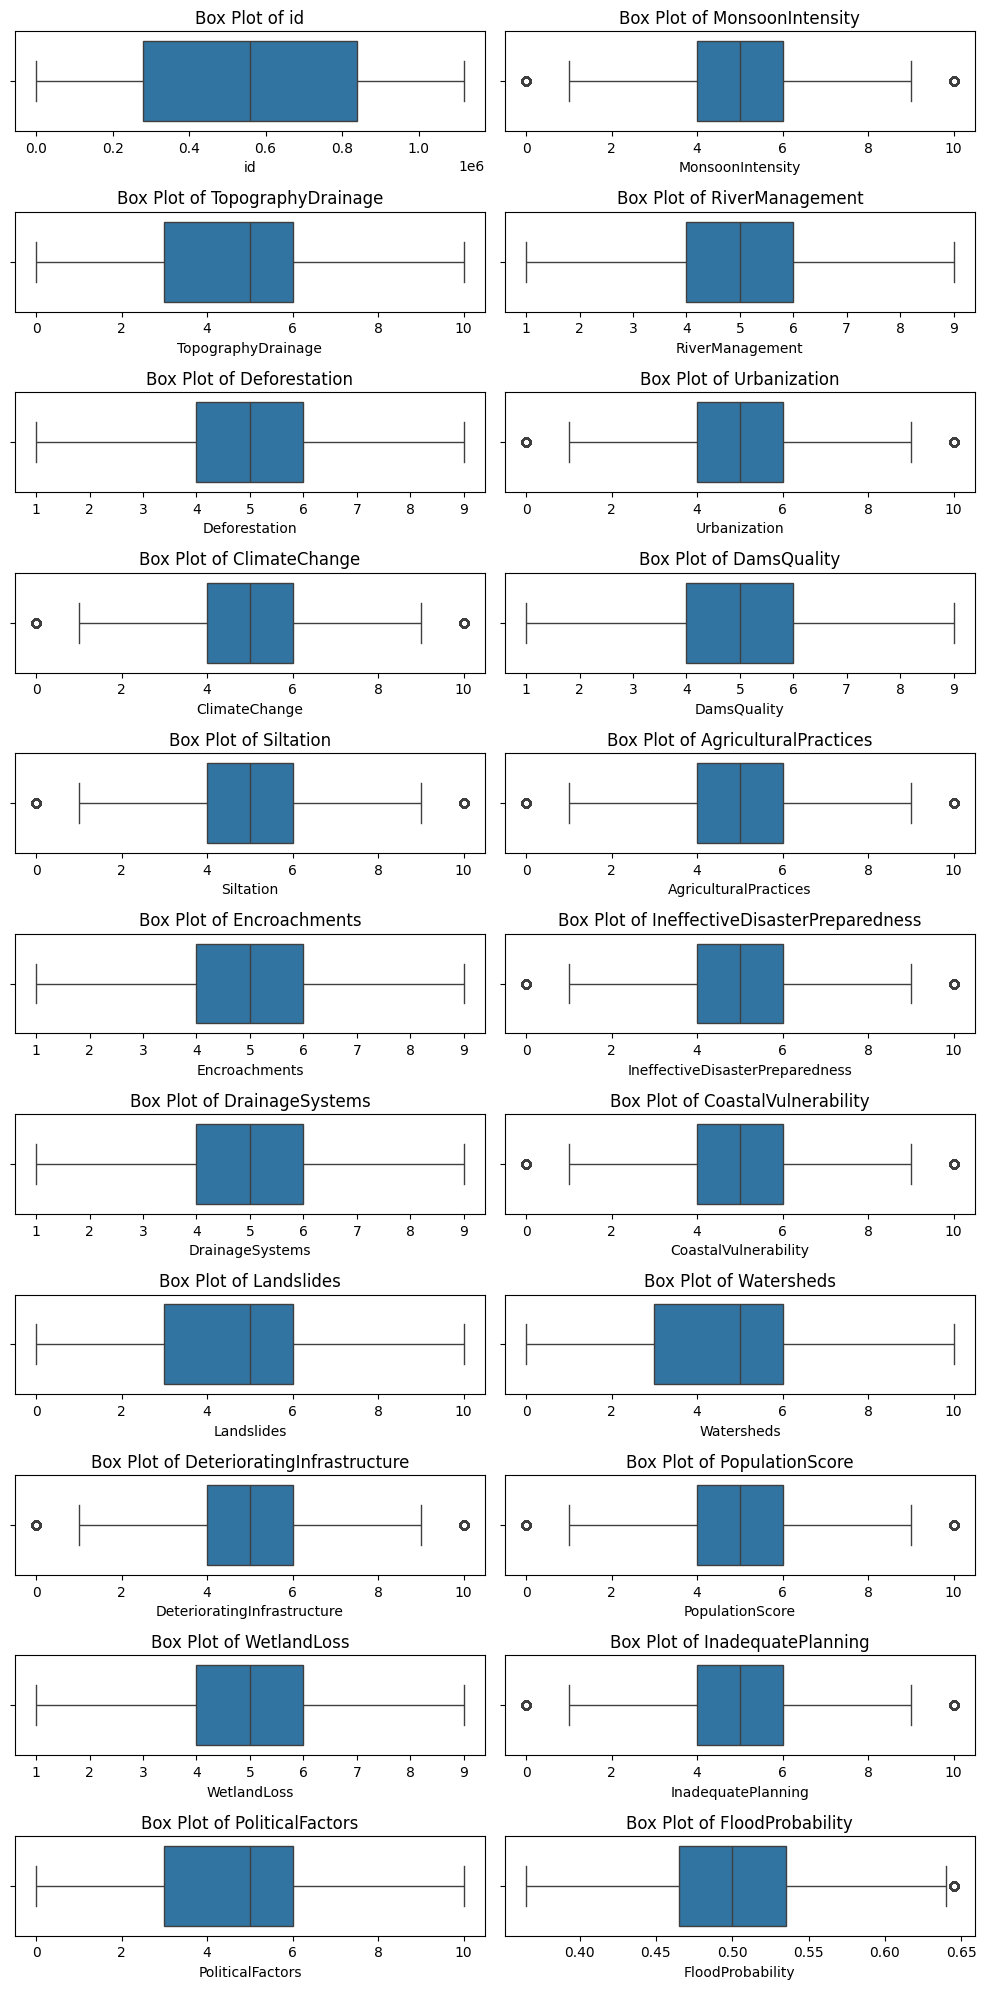

In [8]:
# Menetapkan IQR
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1
bounderies = 1.5 * iqr

# Untuk melakukan pemilahan data, hanya menyimpan data yang masuk ke dalam layer
condition = ~((train < q1 - bounderies) | (train > q3 + bounderies)).any(axis=1)
df = train.loc[condition, train.columns]

plt.figure(figsize = (10,20))

for i, column in enumerate(df.columns, start=1):
    plt.subplot(11,2,i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

## PREPROCESSING DATA

In [9]:
from sklearn.preprocessing import StandardScaler

# memastikan hanya data dengan tipe numerikal yang diproses
numerical_features = df.select_dtypes(include='number').columns
numerical_features

# standardisasi fitur numeric
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,3.128825e-16,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


In [10]:
# standar deviasi kini menjadi bernilai 1 semua setelah dilakukan standardisasi

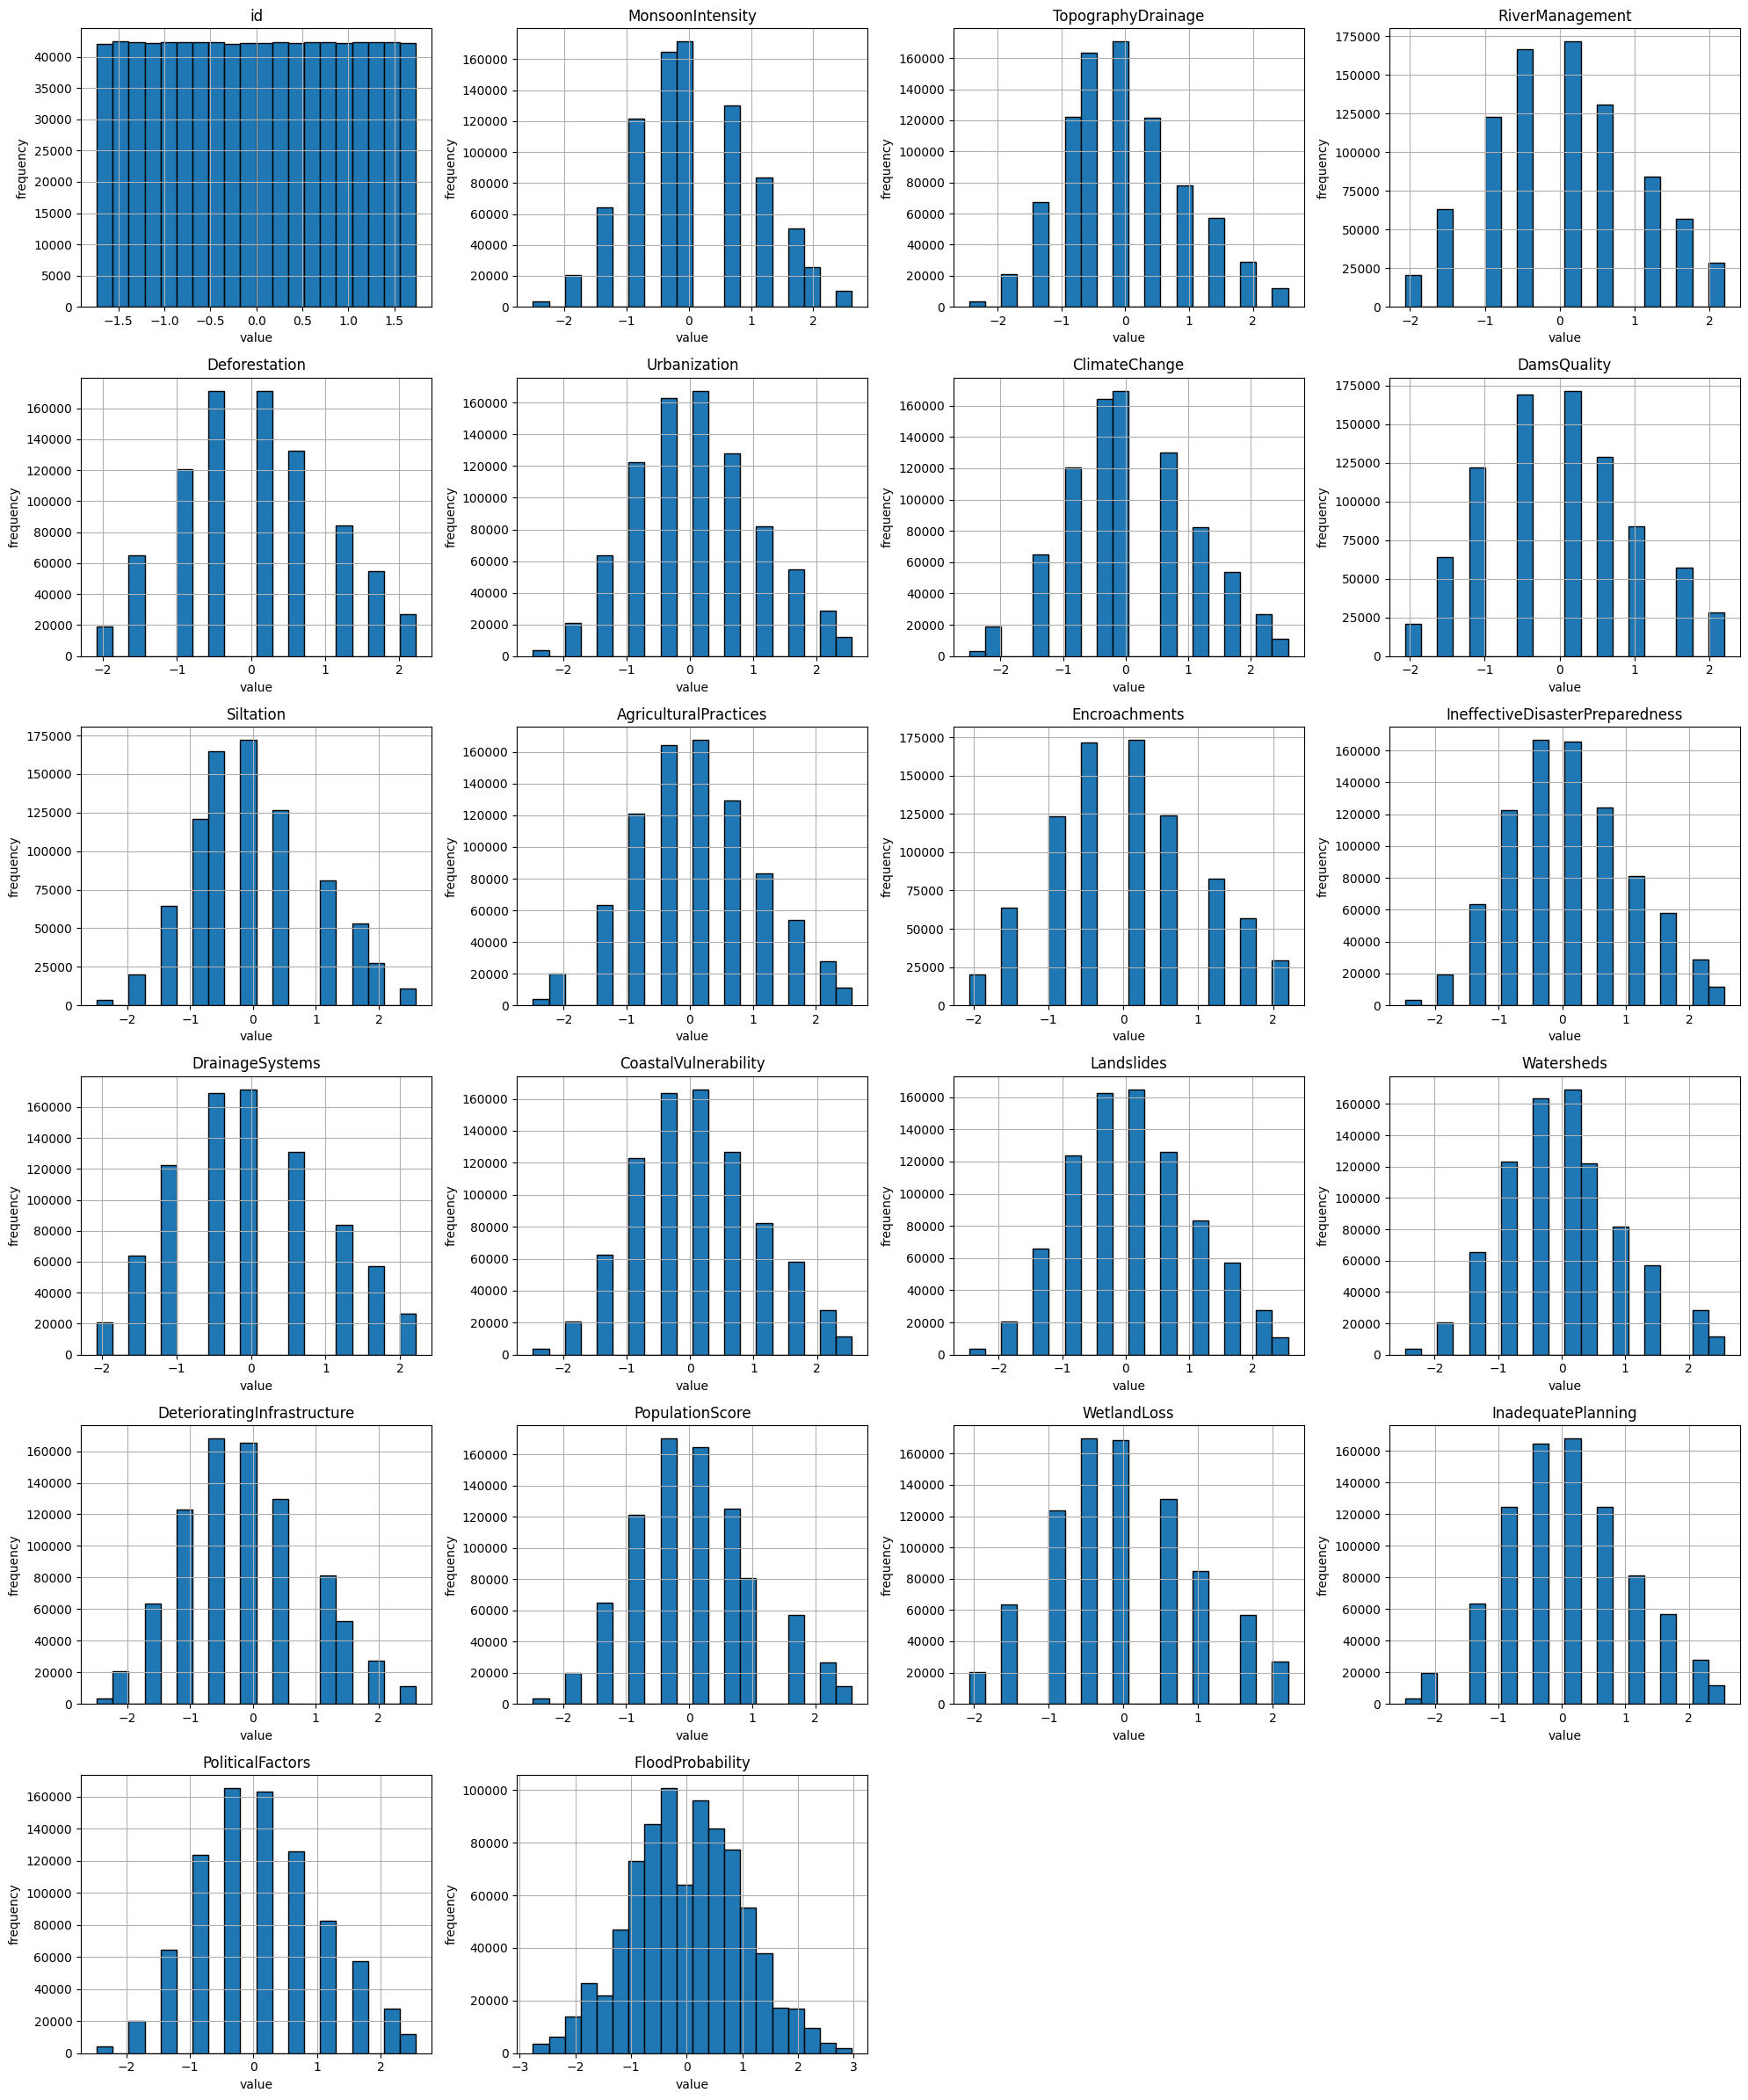

In [11]:
# Menghitung jumlah variable
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom
n_cols = 4
n_rows = -(-num_vars//n_cols)

# Membuat Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes untuk memudahkan iterasi
axes = axes.flatten()

# plot setiap variable
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')

# menhapus subplot yang tidak terpakai
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Merapikan grafik
plt.tight_layout()
plt.show()
    

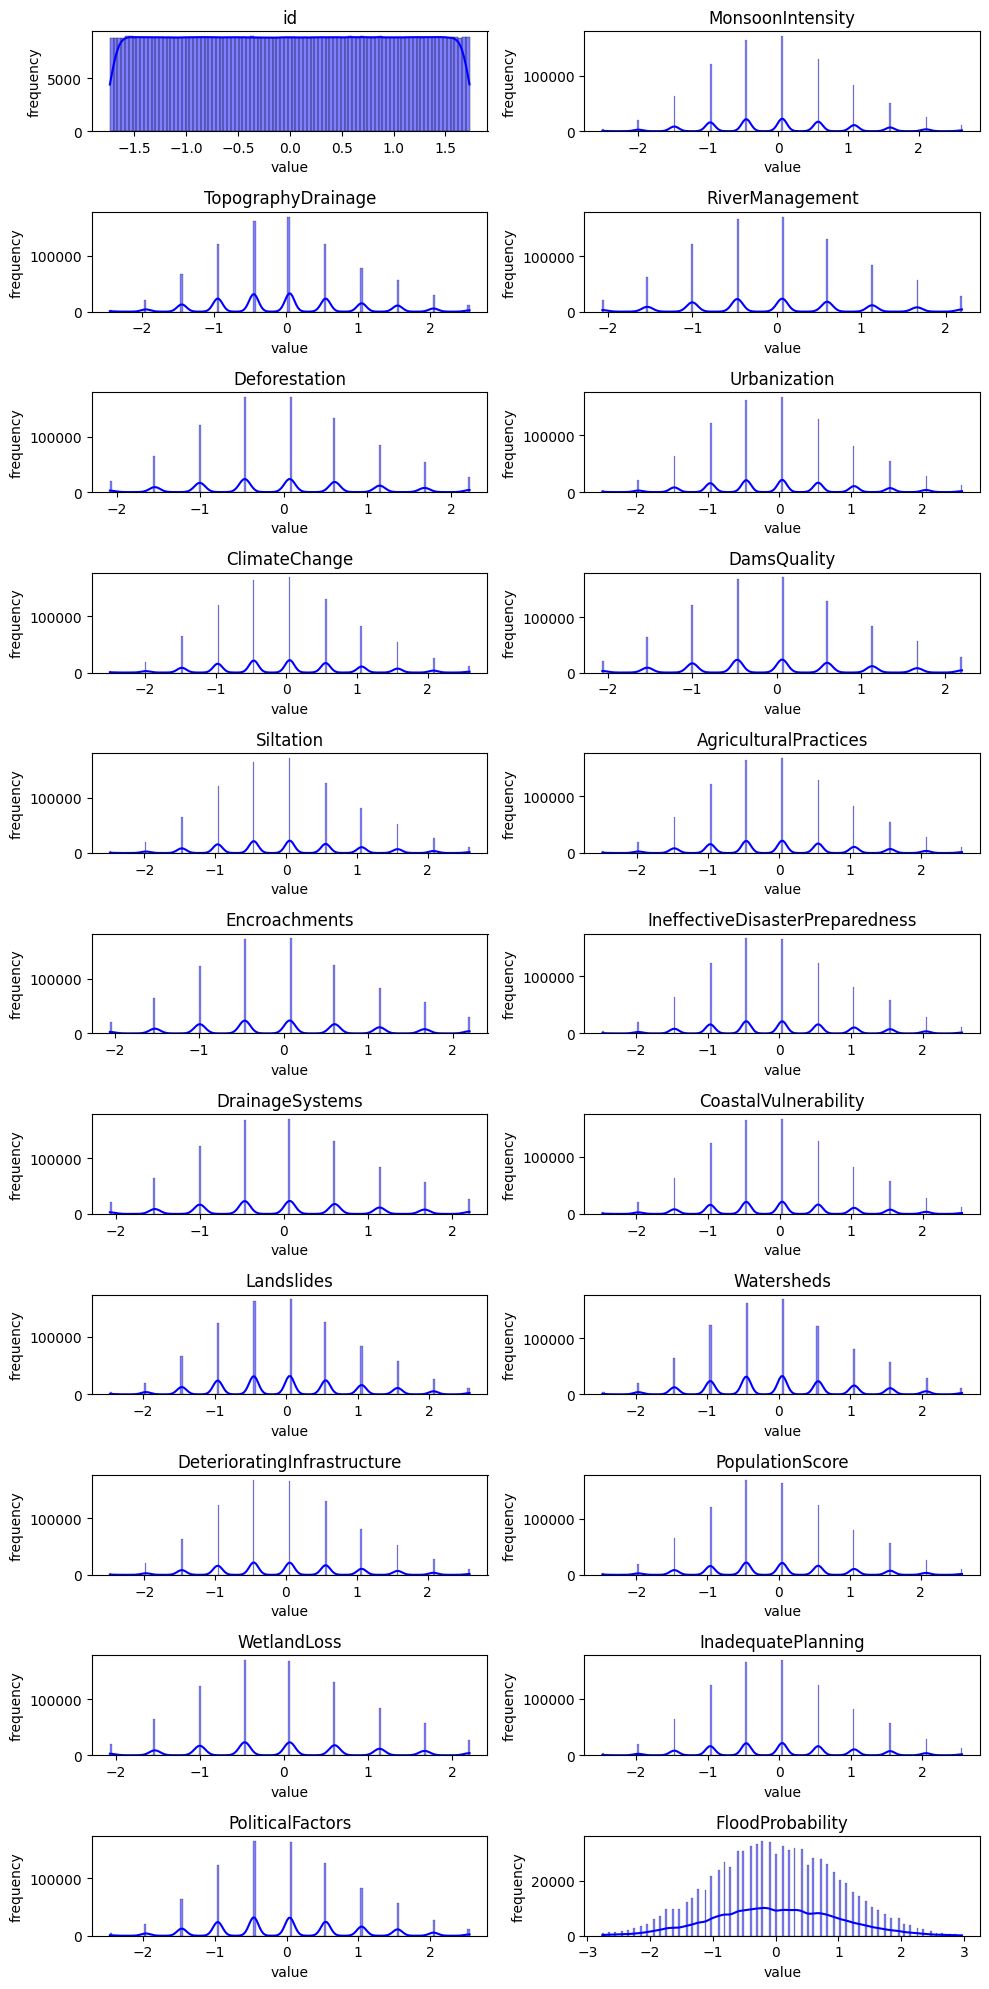

In [12]:
# membuat grafik dengan sns
plt.figure(figsize=(10,20))
for i, column in enumerate(df.columns, start = 1):
    plt.subplot(11,2,i)
    sns.histplot(x=df[column], kde=True, color='blue')
    plt.title(f'{column}')
    plt.xlabel('value')
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()
    

In [13]:
# menghitung korelasi antara variabel target dan semua variabel lainnya\
target_corr = df.corr()['FloodProbability']

# mengurutkan hasil korelasi berdasarkan kekuaran korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

print(target_corr_sorted)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.191663
TopographyDrainage                 0.190517
MonsoonIntensity                   0.189866
Siltation                          0.188480
Landslides                         0.187930
PopulationScore                    0.186834
ClimateChange                      0.186776
AgriculturalPractices              0.185599
IneffectiveDisasterPreparedness    0.185390
Watersheds                         0.184573
PoliticalFactors                   0.184039
InadequatePlanning                 0.182918
Urbanization                       0.181551
DamsQuality                        0.181393
RiverManagement                    0.181004
Deforestation                      0.179304
CoastalVulnerability               0.179079
WetlandLoss                        0.178002
Encroachments                      0.174129
DrainageSystems                    0.172513
id                                 0.000287
Name: FloodProbability, dtype: f

In [14]:
# NOTE
# ABS DIGUNAKAN UNTUK MENGAMBIL NILAI ABSOLUT

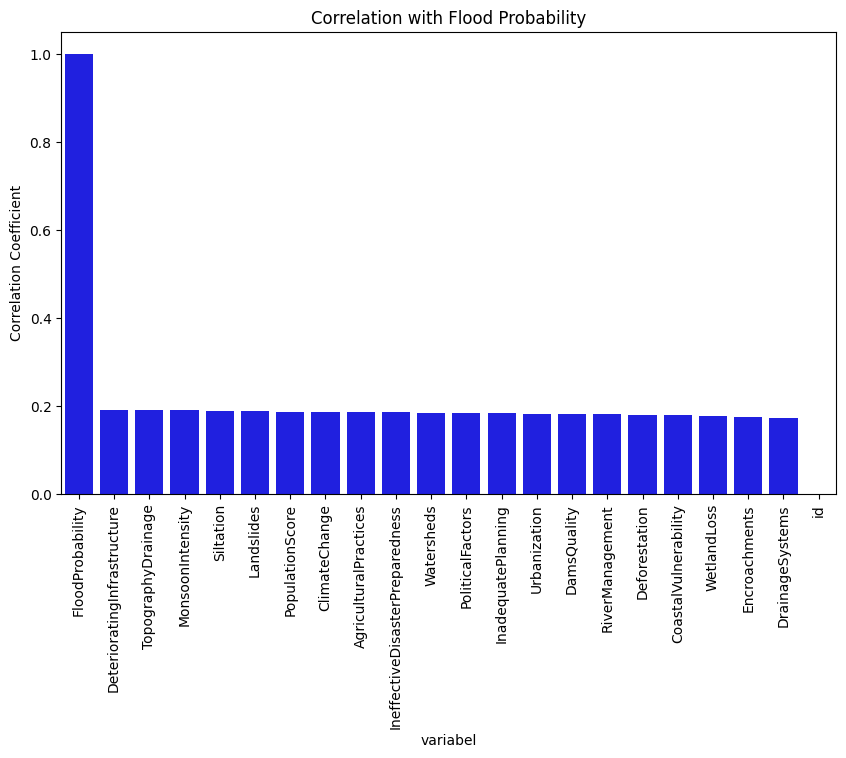

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(data=target_corr_sorted, color='blue' )
plt.title('Correlation with Flood Probability')
plt.xlabel('variabel')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()

## SPLITTING DATA

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# memisahkan fitur (x) dan target (y)
x = df.drop(columns='FloodProbability')
y = df['FloodProbability']

# membagi data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(x))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


## MODELLING

In [25]:
from sklearn.linear_model import Lars, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

lars = Lars(n_nonzero_coefs=1).fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)
gbr = GradientBoostingRegressor(random_state=184).fit(x_train, y_train)

print('selesai modelling')

selesai modelling


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation(model, x_test, y_test):
    y_predict = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    results = {
        'MAE' : mae,
        'MSE' : mse,
        'R2 Score' : r2
    }
    return results

all_evaluation = {
    'LARS' : evaluation(lars, x_test, y_test),
    'LR' : evaluation(lr, x_test, y_test),
    'GBR' : evaluation(gbr, x_test, y_test),
}

evaluation_df = pd.DataFrame(columns=['model name', 'MAE', 'MSE', 'R2 Score'])

row = []
for model_name, result in all_evaluation.items():
    row.append({
        'model name' : model_name,
        'MAE' : result['MAE'],
        'MSE' : result['MSE'],
        'R2 Score' : result['R2 Score']
    })

# menambahkan row ke dalam Data Frame
evaluation_df = pd.DataFrame(row)

print(evaluation_df)

  model name       MAE       MSE  R2 Score
0       LARS  0.806497  0.998246  0.000764
1         LR  0.329142  0.171296  0.828534
2        GBR  0.512672  0.380491  0.619132


In [27]:
# metode lain dalam memasukkan hasil ke dalam dataframe
eval_df = pd.DataFrame(
    [
        {'model name': model_name, **result} for model_name, result in all_evaluation.items()
    ]
)

print(eval_df)

  model name       MAE       MSE  R2 Score
0       LARS  0.806497  0.998246  0.000764
1         LR  0.329142  0.171296  0.828534
2        GBR  0.512672  0.380491  0.619132
